## Calculate quotient between SNR and RMSE for each waveform

### Import libraries

In [1]:
# Imports
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from matplotlib import pyplot as plt
import os
import glob
import sys
from matplotlib import gridspec
import random

# Import functions
sys.path.insert(0,'../functions/')
from moon2data import *

### Load catalog of moonquakes

In [2]:
mqdir = '../catalogs/quality_control/'
combined_cat = pd.read_csv(mqdir + 'A17_moonquakes_catalog_nodupes.csv')
combined_cat.drop(list(combined_cat.filter(regex='Unnamed|index')), axis=1, inplace=True)

### Calculate quotient between SNR and RMSE

In [3]:
quotients = []
for r in np.arange(0,len(combined_cat)):
    row = combined_cat.iloc[r]
    snr = row.SNR
    rmse = row.rmse_gauss
    quotients.append(snr/rmse)

In [4]:
combined_cat['SNR_div_RMSE'] = quotients
combined_cat.to_csv(mqdir + 'A17_moonquakes_catalog_nodupes.csv',index=False)

### Plot distribution of SNR and RMSE

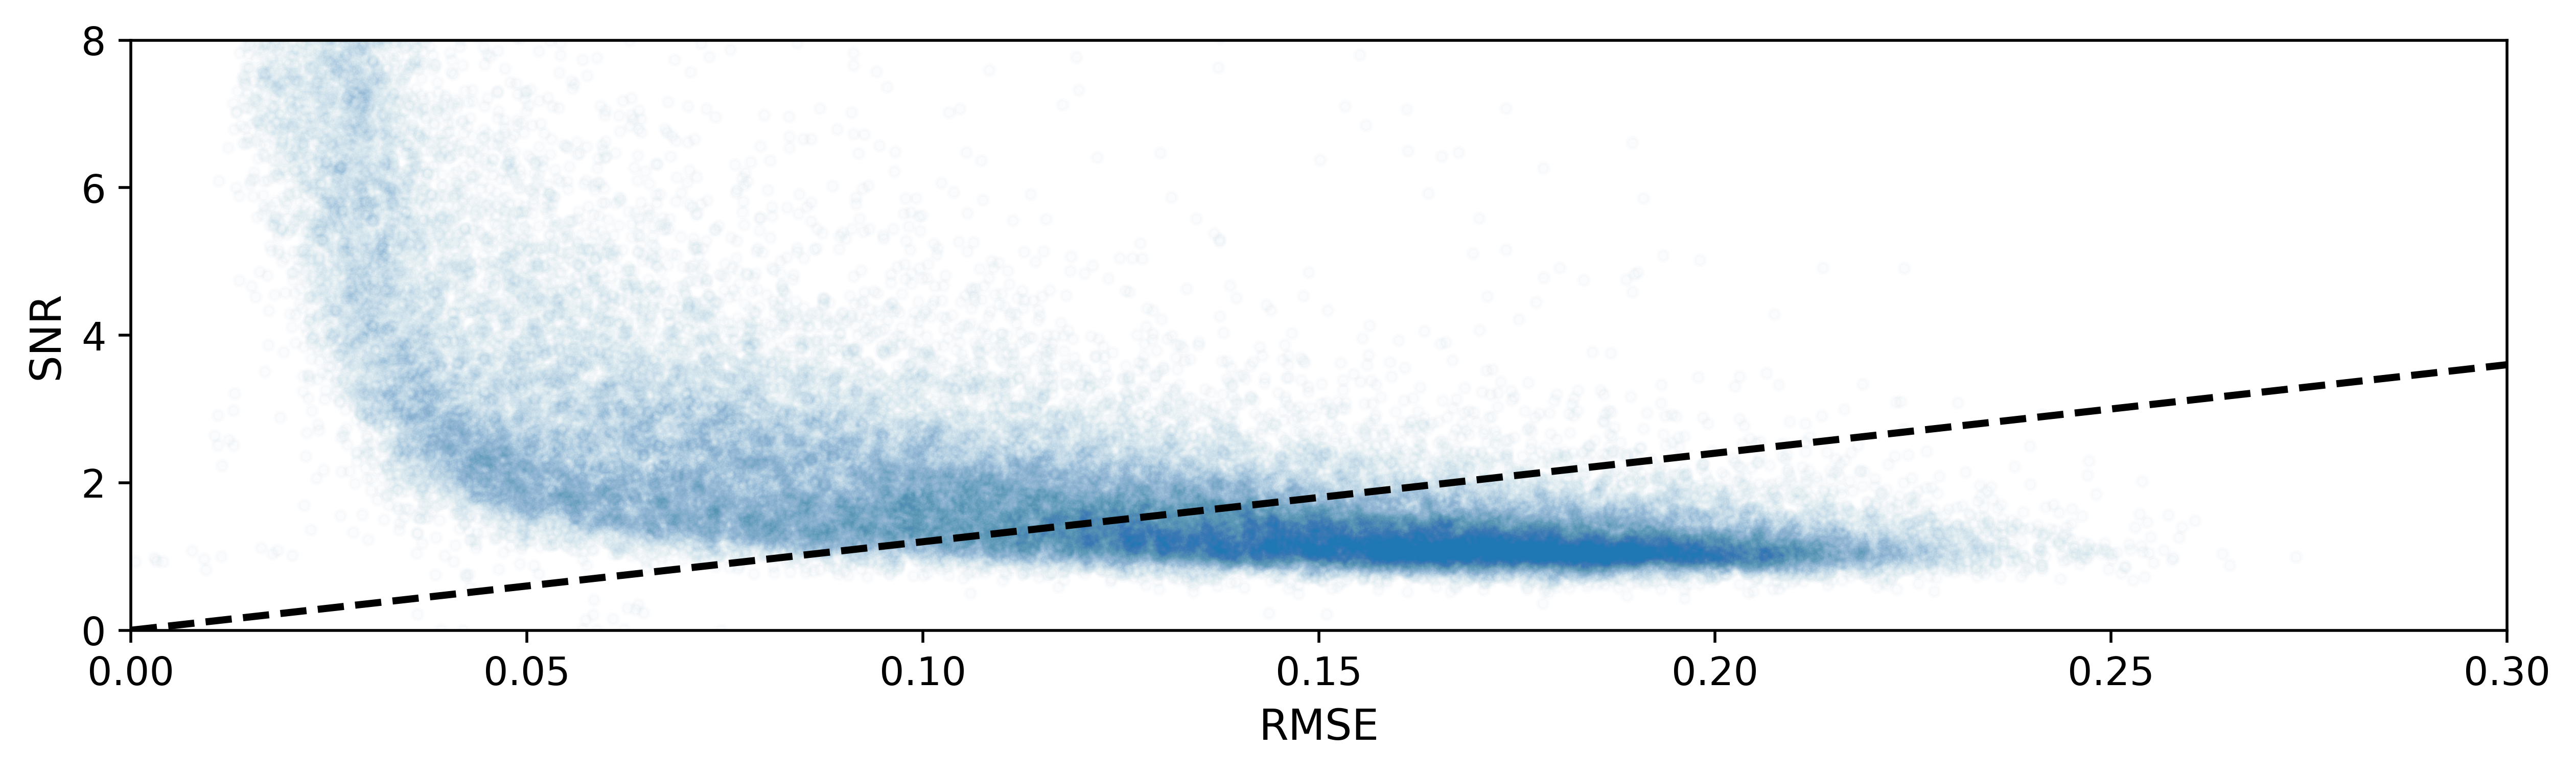

In [5]:
rmses = np.array(combined_cat.rmse_gauss.tolist())
snrs = np.array(combined_cat.SNR.tolist())
fig,ax = plt.subplots(1,1,figsize=(12,3),dpi=500)
ax.scatter(rmses,snrs,marker='.',alpha=0.015)
xvals = np.arange(0, 1, 0.1)
yvals = 12*xvals
ax.plot(xvals,yvals,color='black', linestyle='--', linewidth=2)
ax.set_xlim([0,0.3])
ax.set_ylim([0,8])
ax.set_ylabel('SNR',fontsize=12)
ax.set_xlabel('RMSE',fontsize=12)
ax.tick_params(axis='both',labelsize=11)